Training Accuracy: 65.63%
Validation Accuracy: 65.78%
Testing Accuracy: 65.04%


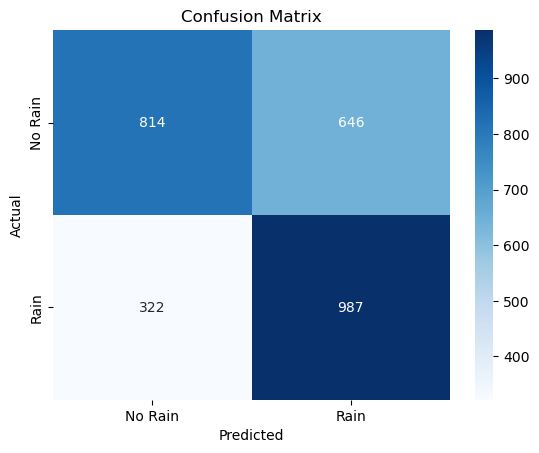

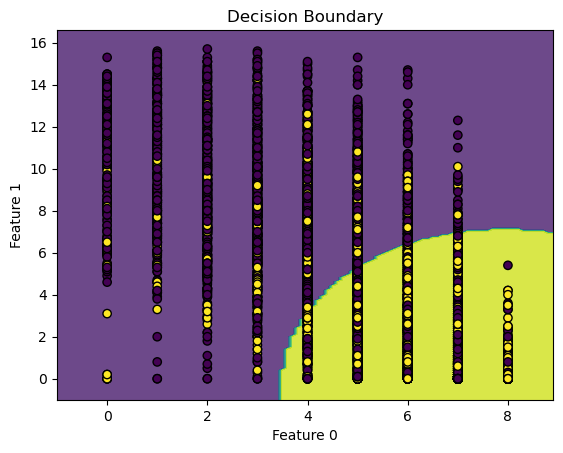

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
file_path = 'london_weather.csv'
data = pd.read_csv(file_path)

# Preprocessing
data = data.dropna().reset_index(drop=True)

# Selecting features and target
features = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp']
target = 'precipitation'

data[target] = (data[target] > 0).astype(int)

# Split the data into features and target
X = data[features].values
y = data[target].values

# Split data into train, validation, and test sets
def get_train_valid_test_data(X, y):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.8, random_state=42)
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

class GaussianNaiveBayes:
    def __init__(self):
        self.log_priors = None
        self.means = None
        self.stds = None

    def fit(self, X, y):
        unique_classes = np.unique(y)
        self.log_priors = np.log([np.mean(y == cls) for cls in unique_classes])
        self.means = np.array([X[y == cls].mean(axis=0) for cls in unique_classes])
        self.stds = np.array([X[y == cls].std(axis=0) for cls in unique_classes])
        return self

    def predict(self, X):
        log_likelihoods = []
        for cls_idx in range(self.means.shape[0]):
            mu = self.means[cls_idx]
            sigma = self.stds[cls_idx]
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma**2)) - 0.5 * np.sum(((X - mu)**2) / (sigma**2), axis=1)
            log_likelihoods.append(log_likelihood)
        log_likelihoods = np.array(log_likelihoods).T
        log_posteriors = log_likelihoods + self.log_priors
        return np.argmax(log_posteriors, axis=1)

# Initialize and train the model
model = GaussianNaiveBayes()
model.fit(X_trn, y_trn)

# Evaluate on training set
train_predictions = model.predict(X_trn)
train_accuracy = accuracy_score(y_trn, train_predictions) * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Evaluate on validation set
val_predictions = model.predict(X_vld)
val_accuracy = accuracy_score(y_vld, val_predictions) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Evaluate on test set
test_predictions = model.predict(X_tst)
test_accuracy = accuracy_score(y_tst, test_predictions) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        pd.DataFrame(cfm, index=["No Rain", "Rain"], columns=["No Rain", "Rain"]),
        annot=True,
        fmt="d",
        cmap="Blues",
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_tst, test_predictions)

selected_features = [0, 1]
X_trn_2d = X_trn[:, selected_features]
X_vld_2d = X_vld[:, selected_features]
X_tst_2d = X_tst[:, selected_features]

model_2d = GaussianNaiveBayes()
model_2d.fit(X_trn_2d, y_trn)

def plot_decision_boundary(model, X, y, feature_indices=(0, 1)):
    X_selected = X
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, edgecolors="k", marker="o")
    plt.title("Decision Boundary")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()

plot_decision_boundary(model_2d, X_trn_2d, y_trn)


Train RMSE: 0.0589
Validation RMSE: 0.0578
Test RMSE: 0.0614


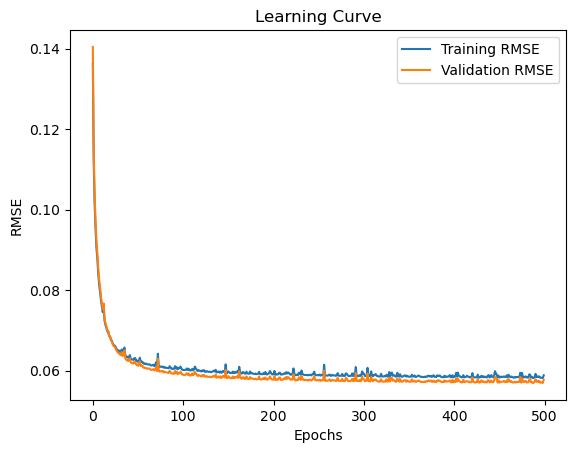

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'london_weather.csv'
data = pd.read_csv(file_path)

# Preprocessing
data = data.dropna().reset_index(drop=True)

# Select features and target
features = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp']
target = 'precipitation'

X = data[features].values
y = data[target].values.reshape(-1, 1)

y = y / y.max()

# Split the data into training, validation, and testing sets
def get_preprocessed_data():
    X_trn, X_temp, y_trn, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_vld, X_tst, y_vld, y_tst = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

class Linear:
    @staticmethod
    def activation(z):
        return z

    @staticmethod
    def derivative(z):
        return np.ones_like(z)

class Tanh:
    @staticmethod
    def activation(z):
        return np.tanh(z)

    @staticmethod
    def derivative(z):
        return 1 - np.tanh(z) ** 2

def init_weights(n_input_features, hidden_neurons, output_neurons):
    W1 = np.random.uniform(-0.5, 0.5, size=(n_input_features, hidden_neurons))
    b1 = np.ones((1, hidden_neurons))
    W2 = np.random.uniform(-0.5, 0.5, size=(hidden_neurons, output_neurons))
    b2 = np.ones((1, output_neurons))
    return W1, b1, W2, b2

def forward(X, W1, b1, W2, b2):
    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)
    Z2 = A1 @ W2 + b2
    A2 = Linear.activation(Z2)
    return Z1, A1, Z2, A2

def output_layer_grads(y, A1, A2):
    dA2 = A2 - y
    W2_avg_grad = (A1.T @ dA2) / A1.shape[0]
    b2_avg_grad = np.sum(dA2, axis=0, keepdims=True) / A1.shape[0]
    return W2_avg_grad, b2_avg_grad

def hidden_layer_grads(X, W2, Z1, dA2):
    dZ1 = (dA2 @ W2.T) * Tanh.derivative(Z1)
    W1_avg_grad = (X.T @ dZ1) / X.shape[0]
    b1_avg_grad = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
    return W1_avg_grad, b1_avg_grad

class NeuralNetwork:
    def __init__(self, hidden_neurons, output_neurons, alpha, batch_size, epochs, seed=0):
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.W1, self.b1, self.W2, self.b2 = None, None, None, None
        self.trn_error = []
        self.vld_error = []

    def fit(self, X_trn, y_trn, X_vld=None, y_vld=None):
        np.random.seed(self.seed)
        self.W1, self.b1, self.W2, self.b2 = init_weights(
            X_trn.shape[1], self.hidden_neurons, self.output_neurons
        )

        for epoch in range(self.epochs):
            indices = np.arange(X_trn.shape[0])
            np.random.shuffle(indices)
            for start_idx in range(0, X_trn.shape[0], self.batch_size):
                batch_indices = indices[start_idx:start_idx + self.batch_size]
                X_batch, y_batch = X_trn[batch_indices], y_trn[batch_indices]
                Z1, A1, Z2, A2 = forward(X_batch, self.W1, self.b1, self.W2, self.b2)

                W2_grad, b2_grad = output_layer_grads(y_batch, A1, A2)
                W1_grad, b1_grad = hidden_layer_grads(X_batch, self.W2, Z1, A2 - y_batch)

                self.W2 -= self.alpha * W2_grad
                self.b2 -= self.alpha * b2_grad
                self.W1 -= self.alpha * W1_grad
                self.b1 -= self.alpha * b1_grad

            # Compute training error
            _, _, _, A2_trn = forward(X_trn, self.W1, self.b1, self.W2, self.b2)
            trn_rmse = np.sqrt(np.mean((A2_trn - y_trn) ** 2))
            self.trn_error.append(trn_rmse)

            # Compute validation error
            if X_vld is not None:
                _, _, _, A2_vld = forward(X_vld, self.W1, self.b1, self.W2, self.b2)
                vld_rmse = np.sqrt(np.mean((A2_vld - y_vld) ** 2))
                self.vld_error.append(vld_rmse)

    def predict(self, X):
        _, _, _, A2 = forward(X, self.W1, self.b1, self.W2, self.b2)
        return A2

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

# Initialize and train the neural network
nn = NeuralNetwork(hidden_neurons=64, output_neurons=1, alpha=0.01, batch_size=32, epochs=500, seed=42)
nn.fit(X_trn, y_trn, X_vld, y_vld)

# Predict and evaluate
train_rmse = np.sqrt(np.mean((nn.predict(X_trn) - y_trn) ** 2))
validation_rmse = np.sqrt(np.mean((nn.predict(X_vld) - y_vld) ** 2))
test_rmse = np.sqrt(np.mean((nn.predict(X_tst) - y_tst) ** 2))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {validation_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Plot learning curves
plt.plot(nn.trn_error, label="Training RMSE")
plt.plot(nn.vld_error, label="Validation RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.show()